In [8]:
import pandas as pd
from extract_data import *

cat_data = get_data('data/categorised.json')

100%|██████████| 95/95 [00:05<00:00, 16.74it/s]


Attempting to visualise the tilt's of a crash and the power spectrum of the crash

100%|██████████| 95/95 [00:00<00:00, 4748.87it/s]


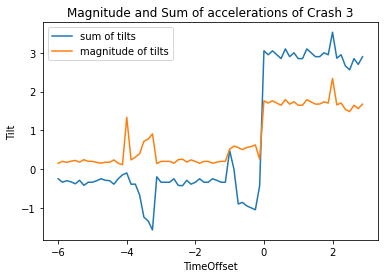

In [9]:
import matplotlib.pyplot as plt
from extract_data import *


crash_3 = cat_data[3]
crash_3_tilts = crash_3[1]
crash_3_tilts_timeseries = get_tilt_timeseries(cat_data)[3]
sum_tilts = crash_3_tilts_timeseries[:,1]+crash_3_tilts_timeseries[:,2]+crash_3_tilts_timeseries[:,0]
crash_3_mags=get_mags(get_tilt_timeseries(cat_data))[3]

plt.plot(np.linspace(-6,2.875,72),sum_tilts, label='sum of tilts') 
plt.plot(np.linspace(-6,2.875,72),crash_3_mags, label='magnitude of tilts')
plt.title('Magnitude and Sum of accelerations of Crash 3')
plt.xlabel('TimeOffset'), plt.ylabel('Tilt')
plt.legend(loc='best')








C:\Users\callu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


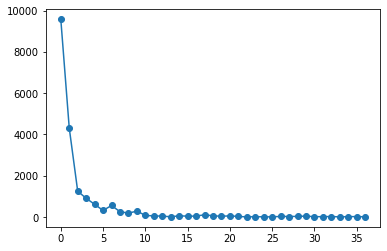

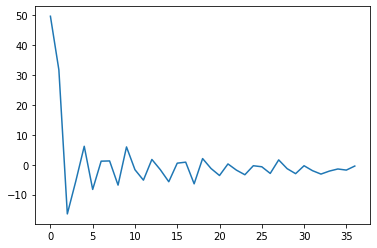

In [10]:
from numpy.fft import rfft,rfftfreq,fft
import spectrum
from spectrum import tools
import pylab


full_signal = sum_tilts
n=72 #number of data points

freqs = rfftfreq(n) 

mask= freqs >= 0 #mask for the frequency values as half are complex conjugates

fft_vals=rfft(full_signal)

plt.figure(0)
p = spectrum.speriodogram(full_signal,NFFT=72);
#p.run()
plt.plot(p,marker='o')

plt.figure(1)
plt.plot(fft_vals)


100%|██████████| 95/95 [00:00<00:00, 3389.78it/s]

37
37
37


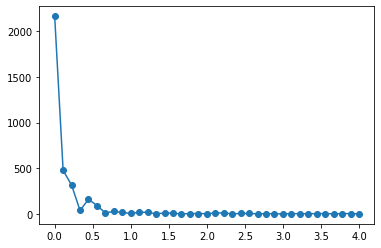

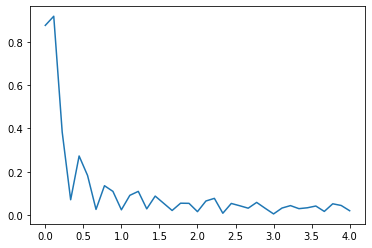

In [11]:


crash_16_tilts_timeseries = get_tilt_timeseries(cat_data)[16]
sum_tilts_16 = crash_16_tilts_timeseries[:,1]+crash_16_tilts_timeseries[:,2]+crash_16_tilts_timeseries[:,0]

N =72 

fft_vals=rfft(sum_tilts_16)
freqs = rfftfreq(sum_tilts_16.size,d=1/8) 
print(fft_vals.size)
print(freqs.size)
abs_fft_vals = abs(fft_vals) / N

plt.figure(0)
p_16 = spectrum.speriodogram(sum_tilts_16,NFFT=72,sampling=8);
print(p_16.size)
plt.plot(freqs,p_16,marker='o')

plt.figure(1)
plt.plot(freqs,abs_fft_vals)


Note: it is really important to use rfft and rfftfreqs in order to find real values frequencies... the speriodogram function clearly uses real valued frequencies only

theory - If we have n frequencies above a certain threshold then we only have a certain ammount of crashs.. 

Catogrised data consists of 1-15 correct crash classifications and 16-95 incorrect crash classifications

Visualisation of both to see if this theory could be correct

100%|██████████| 95/95 [00:00<00:00, 3517.72it/s]


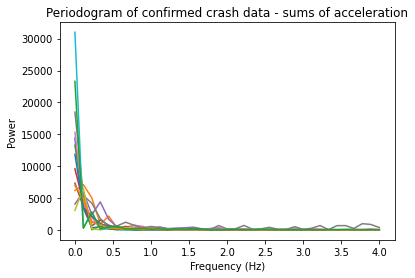

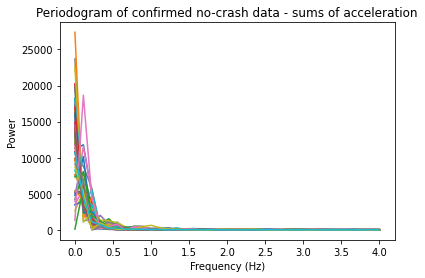

In [12]:
#plotting the fourier transforms and power spectrums of correct crashs

#function to create the plots desired
def pediogram_plot(pediogram_data,fourier_frequencies,title,figure):
    plt.figure(figure)
    for x in range(len(pediogram_data)):
        plt.plot(fourier_frequencies[x],pediogram_data[x])
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.show()


    


        

#initial variables for crash data
#data should be appeneded as nested lists of powers for each crash
fourier_freqs_crash = []
pediogram_data_crash = []
crash_tilt_timeseries = get_tilt_timeseries(cat_data)[0:13]

#sample spacing and number of samples
N=72
s_s = 1/8


#iterating through the 14 confirmed crash cases, taking the foureir transform and pediogram of each
for crash in range(13):
    sum_tilts = []
    tilts_timeseries = []
    tilts_timeseries = crash_tilt_timeseries[crash]
    sum_tilts = tilts_timeseries[:,0]+tilts_timeseries[:,1]+tilts_timeseries[:,2]
    fourier_freqs = rfftfreq(N,d=s_s)
    pediogram_data = spectrum.speriodogram(sum_tilts,NFFT=72)
    fourier_freqs_crash.append(fourier_freqs)
    pediogram_data_crash.append(pediogram_data)

#repeating for the crash data

fourier_freqs_not_crash = []
pediogram_data_not_crash = []
not_crash_tilt_timeseries = get_tilt_timeseries(cat_data)[15:95]

for not_crash in range(80):
    sum_tilts = []
    tilts_timeseries = []
    tilts_timeseries = not_crash_tilt_timeseries[not_crash]
    sum_tilts = tilts_timeseries[:,0]+tilts_timeseries[:,1]+tilts_timeseries[:,2]
    fourier_freqs = rfftfreq(N,d=s_s)
    pediogram_data = spectrum.speriodogram(sum_tilts,NFFT=72)
    fourier_freqs_not_crash.append(fourier_freqs)
    pediogram_data_not_crash.append(pediogram_data)

pediogram_plot(pediogram_data_crash,fourier_freqs_crash,'Periodogram of confirmed crash data - sums of acceleration',0)

pediogram_plot(pediogram_data_not_crash,fourier_freqs_not_crash,'Periodogram of confirmed no-crash data - sums of acceleration',1)




    
    



100%|██████████| 95/95 [00:00<00:00, 5016.98it/s]


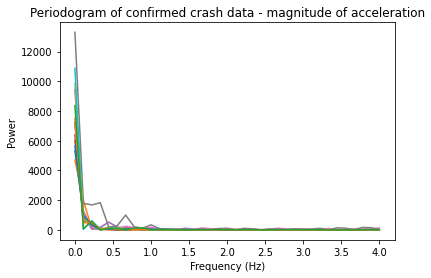

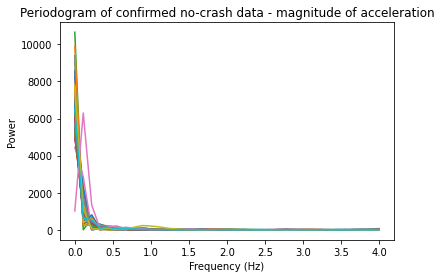

In [13]:
#repeating the above code using the magnitude of accelerations
crash_mags=get_mags(get_tilt_timeseries(cat_data))[0:13]

fourier_freqs_mags_crash = []
pediogram_data_mags_crash = []

#sample spacing and number of samples
N=72
s_s = 1/8


#iterating through the 14 confirmed crash cases, taking the foureir transform and pediogram of each
for crash in range(13):
    mags = crash_mags[crash]
    fourier_freqs = rfftfreq(N,d=s_s)
    pediogram_data = spectrum.speriodogram(mags,NFFT=72)
    fourier_freqs_mags_crash.append(fourier_freqs)
    pediogram_data_mags_crash.append(pediogram_data)

fourier_freqs_mags_not_crash = []
pediogram_data_mags_not_crash = []
not_crash_mags=get_mags(get_tilt_timeseries(cat_data))[15:95]


#repeating for the crash data and magnitudes of acceleration

for crash in range(80):
    mags = not_crash_mags[crash]
    fourier_freqs = rfftfreq(N,d=s_s)
    pediogram_data = spectrum.speriodogram(mags,NFFT=72)
    fourier_freqs_mags_not_crash.append(fourier_freqs)
    pediogram_data_mags_not_crash.append(pediogram_data)

pediogram_plot(pediogram_data_mags_crash,fourier_freqs_mags_crash,'Periodogram of confirmed crash data - magnitude of acceleration',0)

pediogram_plot(pediogram_data_mags_not_crash,fourier_freqs_mags_not_crash,'Periodogram of confirmed no-crash data - magnitude of acceleration',1)
